## Installing Necessary Libraries

In [2]:
# Install the 'requests' library for making HTTP requests to access web data
!pip install requests

# Install the 'beautifulsoup4' library for parsing HTML and XML documents
!pip install beautifulsoup4

# Install the 'nltk' library for natural language processing tasks
!pip install nltk

## Importing and Initializing Essential Libraries

In [3]:
# Importing necessary libraries for data manipulation, numerical operations, regular expressions, string operations, natural language processing, data visualization, and text analysisimport pandas as pd
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Web Scraping and Data Collection

In [4]:
# Importing necessary libraries for web scraping (requests, BeautifulSoup) and CSV file handling (csv)
import requests
from bs4 import BeautifulSoup
import csv

# List of URLs to scrape
urls = [
    "https://microform.digital/boa/collections/63/the-east-india-company-corrupt-governance-and-cruelty-in-india-1806-1814",
    "https://microform.digital/boa/collections/20/the-east-india-company-laying-the-foundations-for-british-colonial-domination-of-india-1752-1774",
    "https://microform.digital/boa/collections/28/indian-and-sri-lankan-records-from-colonial-missionaries-1770-1931",
    "https://microform.digital/boa/collections/36/indian-communists-and-trade-unionists-on-trial-the-meerut-conspiracy-1929-1933",
    "https://microform.digital/boa/collections/88/world-news-in-indian-newspapers-1782-1908"
]

# Initialize a list to store all reviews
all_reviews = []

# Loop through each URL and scrape the data
for url in urls:
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all 'p' tags on the page
        paragraphs = soup.find_all('p')
        
        # Extract the text from each 'p' tag and store it in the list
        for p in paragraphs:
            all_reviews.append(p.get_text())
    else:
        print(f"Failed to retrieve the page {url}. Status code:", response.status_code)

# Open a new CSV file to write the data
with open('reviews.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write the header row
    csvwriter.writerow(['Sl. No.', 'Review'])
    
    # Write the reviews to the CSV file with incremental serial numbers
    for i, review in enumerate(all_reviews, start=1):
        csvwriter.writerow([i, review])

# Print a success message indicating that data has been successfully written to reviews.csv
print("Data has been successfully written to reviews.csv")


Data has been successfully written to reviews.csv


## Loading Data into a DataFrame

In [5]:
# Read the data from the CSV file 'reviews.csv' into a pandas DataFrame named df
df = pd.read_csv('reviews.csv')

## Inspecting Imported Data

In [6]:
# Display the first few rows of the DataFrame df to inspect the imported data
df.head()

,Sl. No.,Review
0,1,Get full access to The East India Company: Cor...
1,2,Purchase a license below to view the full coll...
2,3,Already have a license? Sign in to view the co...
3,4,"The first Earl of Minto, Sir Gilbert Elliot Mu..."
4,5,The collection offers valuable insights into t...


## DataFrame Summary Information

In [7]:
# Display concise summary information about the DataFrame df, including the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sl. No.  74 non-null     int64 
 1   Review   74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


## Descriptive Statistics of Numerical Columns

In [8]:
# Generate descriptive statistics of the numerical columns in the DataFrame df
df.describe()

,Sl. No.
count,74.000000
mean,37.500000
std,21.505813
min,1.000000
25%,19.250000
50%,37.500000
75%,55.750000
max,74.000000


## Creating a DataFrame for Text Analysis

In [9]:
# Create a new DataFrame text_df containing only the 'Review' column from df
text_df = df[['Review']]

# Display the first few rows of the text_df DataFrame to inspect the 'Review' data
text_df.head()

,Review
0,Get full access to The East India Company: Cor...
1,Purchase a license below to view the full coll...
2,Already have a license? Sign in to view the co...
3,"The first Earl of Minto, Sir Gilbert Elliot Mu..."
4,The collection offers valuable insights into t...


## Checking for Missing Values in Reviews

In [10]:
# Check the number of missing values (NaN) in the 'Review' column of the text_df DataFrame
text_df.Review.isna().sum()

0

## Calculating Review Lengths

In [11]:
# Calculate the length of each review in the 'Review' column and store it in a new column 'Review_length'
text_df['Review_length'] = text_df['Review'].apply(len)

# Print the shape of the text_df DataFrame to display the number of rows and columns
print(text_df.shape)

# Display the first few rows of the text_df DataFrame including the new 'Review_length' column
text_df.head()

(74, 2)


,Review,Review_length
0,Get full access to The East India Company: Cor...,94
1,Purchase a license below to view the full coll...,53
2,Already have a license? Sign in to view the co...,54
3,"The first Earl of Minto, Sir Gilbert Elliot Mu...",475
4,The collection offers valuable insights into t...,819


## Descriptive Statistics of Review Lengths

In [12]:
# Generate descriptive statistics for the 'Review_length' column in the text_df DataFrame
text_df['Review_length'].describe()

count     74.000000
mean     236.310811
std      168.126821
min       37.000000
25%      117.250000
50%      210.500000
75%      312.500000
max      819.000000
Name: Review_length, dtype: float64

## Distribution of Review Lengths

C:\Users\himav\AppData\Local\Temp\ipykernel_8852\3313388152.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_df['Review_length'] ,hist=True, bins=100)


<Axes: xlabel='Review_length', ylabel='Density'>

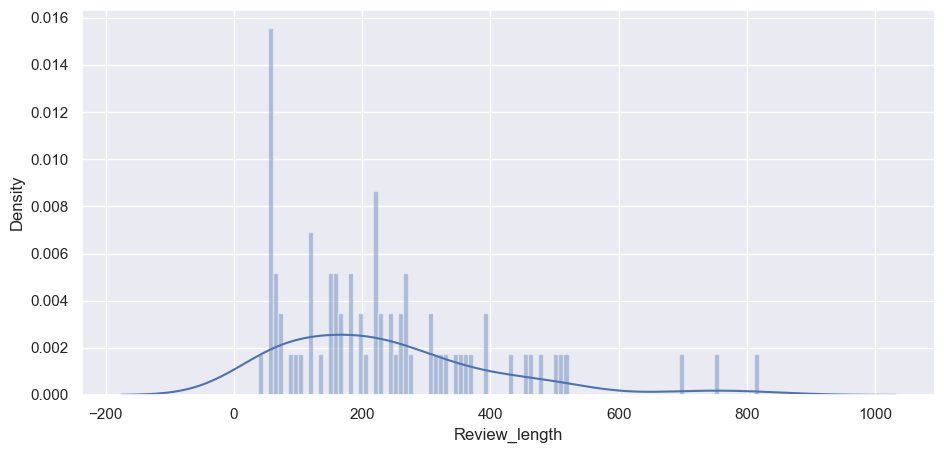

In [13]:
# Set the figure size for seaborn plots to (11, 5) inches
sns.set(rc={'figure.figsize':(11,5)})

# Create a distribution plot (histogram) of the 'Review_length' column in text_df
sns.distplot(text_df['Review_length'] ,hist=True, bins=100)

## Counting Exclamation Marks

In [14]:
# Count the number of exclamation marks ('!') in the input string_text.
def count_exclamation_mark(string_text):
    count = 0
    for char in string_text:
        if char == '!':
            count += 1
    return count

## Counting Exclamation Marks in Reviews

In [15]:
# Apply the count_exclamation_mark function to each 'Review' in text_df and create a new column 'count_exc'
text_df['count_exc'] = text_df['Review'].apply(count_exclamation_mark)

# Display the first 5 rows of the text_df DataFrame including the new 'count_exc' column
text_df.head(5)

,Review,Review_length,count_exc
0,Get full access to The East India Company: Cor...,94,0
1,Purchase a license below to view the full coll...,53,0
2,Already have a license? Sign in to view the co...,54,0
3,"The first Earl of Minto, Sir Gilbert Elliot Mu...",475,0
4,The collection offers valuable insights into t...,819,0


## Descriptive Statistics of Exclamation Mark Counts

In [16]:
# Generate descriptive statistics for the 'count_exc' column in text_df, specifying percentiles from 20% to 100% in steps of 20%
text_df['count_exc'].describe(np.arange(0.2, 1.0, 0.2))

count    74.0
mean      0.0
std       0.0
min       0.0
20%       0.0
40%       0.0
50%       0.0
60%       0.0
80%       0.0
max       0.0
Name: count_exc, dtype: float64

## Bar Plot of Exclamation Mark Counts

<Axes: xlabel='count_exc'>

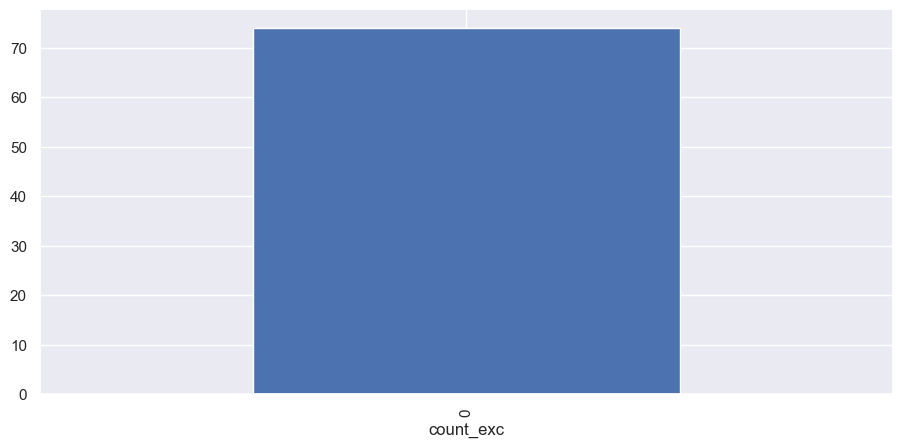

In [17]:
# Generate a bar plot showing the count of each unique value in the 'count_exc' column of text_df
text_df['count_exc'].value_counts().sort_index().plot(kind='bar')

## Finding Rows with Specific Exclamation Mark Count

In [18]:
# Find the index labels of rows in text_df where the 'count_exc' column has a value of 41
text_df[text_df['count_exc']== 41].index

Index([], dtype='int64')

## Retrieving Review Text

In [19]:
# Retrieve the review text located at index label 3 from the 'Review' column of text_df
text_df['Review'][3]

'The first Earl of Minto, Sir Gilbert Elliot Murray Kynynmound, served as governor-general of India from 1807 to 1813. This collection is drawn from his personal papers during his time as the premier of the East India Company (EIC). Amongst these documents you will find extensive correspondence with other officials, papers from the EIC’s political department, papers from its secret department, and files pertaining to the earl’s tenure as president of the Board of Control.'

## Calculating Review Polarity

In [20]:
# Calculate the polarity (sentiment score) of each review in the 'Review' column using TextBlob and store the results in a new column 'Polarity' in the text_df DataFrame
text_df['Polarity'] = text_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first 5 rows of the text_df DataFrame including the new 'Polarity' column
text_df.head(5)

,Review,Review_length,count_exc,Polarity
0,Get full access to The East India Company: Cor...,94,0,-0.075000
1,Purchase a license below to view the full coll...,53,0,0.350000
2,Already have a license? Sign in to view the co...,54,0,0.000000
3,"The first Earl of Minto, Sir Gilbert Elliot Mu...",475,0,-0.045833
4,The collection offers valuable insights into t...,819,0,0.044444


## Distribution of Sentiment Polarity Scores

<Axes: ylabel='Frequency'>

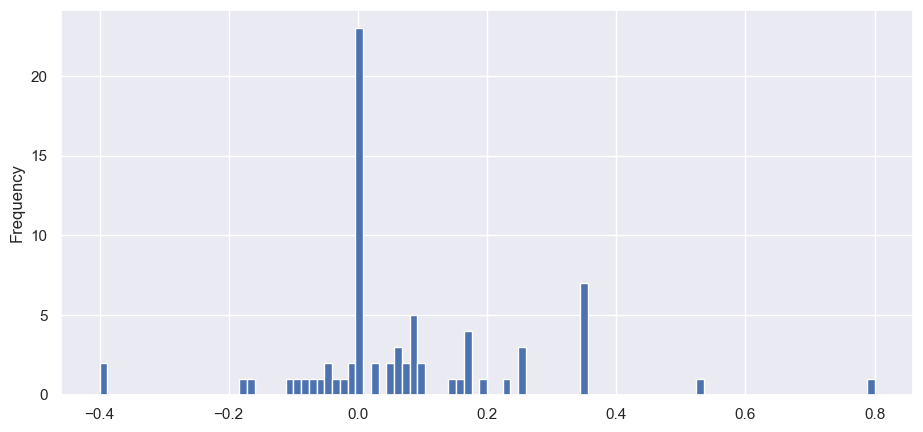

In [21]:
# Generate a histogram plot to visualize the distribution of sentiment polarity scores in the 'Polarity' column of text_df
text_df['Polarity'].plot(kind='hist', bins=100)

## Creating a Copy for Preprocessing

In [22]:
# Create a copy of the text_df DataFrame and assign it to text_prep
text_prep = text_df.copy()

## Standard Punctuation Characters

In [23]:
# The string.punctuation constant contains all standard punctuation characters
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Removing Punctuation from Text

In [24]:
# Remove punctuation characters from the input messy_str.
def punctuation_removal(messy_str):
    
    # List comprehension to filter out characters that are not in string.punctuation
    clean_list = [char for char in messy_str if char not in string.punctuation]
    
    # Join the filtered characters back into a single string
    clean_str = ''.join(clean_list)
    return clean_str

## Applying Punctuation Removal to Reviews

In [25]:
# Apply the punctuation_removal function to each review in the 'Review' column of text_prep
text_prep['Review'] = text_prep['Review'].apply(punctuation_removal)

# Display the first few cleaned reviews from the 'Review' column in text_prep
text_prep['Review'].head()

0    Get full access to The East India Company Corr...
1    Purchase a license below to view the full coll...
2    Already have a license Sign in to view the col...
3    The first Earl of Minto Sir Gilbert Elliot Mur...
4    The collection offers valuable insights into t...
Name: Review, dtype: object

## Collecting Adjectives and Verbs

In [26]:
# Collect adjectives and verbs from the input review_string.
def adj_collector(review_string):
    new_string=[] # Initialize an empty list to store extracted words

    # Tokenize the review_string into words
    review_string = word_tokenize(review_string)
    
    # Use nltk's part-of-speech tagging to get tuples of (word, POS tag)
    tup_word = nltk.pos_tag(review_string)
    
    # Iterate through each tuple (word, POS tag)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0]) 
            
    # Join the collected words into a single string
    return ' '.join(new_string)

## Extracting Adjectives and Verbs from Reviews

In [27]:
# Apply the adj_collector function to each review in the 'Review' column of text_prep
text_prep['Review'] = text_prep['Review'].apply(adj_collector)

# Display the first 7 reviews from the 'Review' column in text_prep after applying adj_collector
text_prep['Review'].head(7)

0                                                 full
1                                   Purchase view full
2                                    have license view
3    first served is drawn personal find extensive ...
4    offers valuable upper was consolidating Indian...
5    is rich wishing explore powerful appeal intere...
6                                                first
Name: Review, dtype: object

## Importing NLTK and Using Stopwords

In [28]:
# Import nltk for natural language processing and stopwords corpus for common word removal
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Now you can use stopwords
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Printing Every 12th Word from Stopwords

In [29]:
# Print every 12th word from the list of English stopwords
print(stopwords.words('english')[::12])

['i', "you'd", 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', "don't", 'aren', 'haven', "shan't"]


## Customizing Stopwords

In [30]:
# Get the list of English stopwords from NLTK's stopwords corpus
stop = stopwords.words('english')

# Append the custom stopword "i'm" to the stop list
stop.append("i'm")

## Cleaning and Customizing Stopwords

In [31]:
# Initialize an empty list to store cleaned stopwords
stop_words = []

# Iterate through each item in the stop list
for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
    
# Print every 12th cleaned stopword from the stop_words list
print(stop_words[::12])

['i', 'youd', 'hers', 'which', 'were', 'a', 'at', 'above', 'again', 'both', 'own', 'dont', 'aren', 'haven', 'shant']


## Defining Terms Related to Colonization

In [32]:
# Define a string containing terms related to colonization
colonization_words = "Colony, Imperialism, Colonizer, Colonized, Empire, Protectorate, Settlement, Exploitation, Trade, Missionary, Plantation, Native, Civilization, Assimilation, Subjugation, Commerce, Conquest, Territory, Administration, Sovereignty"

## Removing Stopwords and Colonization-Related Words

In [33]:
# Remove stopwords and colonization-related words from the input messy_str.
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    
    # Filter out words that are stopwords or in the colonization_words list, and convert to lowercase
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words and word.lower() not in colonization_words ]

## Applying Stopwords and Colonization-Related Words Removal

In [34]:
# Apply the stopwords_removal function to each review in the 'Review' column of text_prep
text_prep['Review'] = text_prep['Review'].apply(stopwords_removal)

# Display the first few cleaned reviews from the 'Review' column in text_prep
text_prep['Review'].head()

0                                               [full]
1                               [purchase, view, full]
2                                      [license, view]
3    [first, served, drawn, personal, find, extensi...
4    [offers, valuable, upper, consolidating, india...
Name: Review, dtype: object

## Printing Preprocessed Review

In [35]:
# Print the preprocessed review at index 1 from the 'Review' column in text_prep
print(text_prep['Review'][1])

['purchase', 'view', 'full']


## Removing Words Containing Numbers

In [36]:
# Remove words containing numbers from the input list_text.
def drop_numbers(list_text):
    list_text_new = []
    
    # Iterate through each word (i) in list_text
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
            
    # Join the cleaned words into a single string
    return ' '.join(list_text_new)

## Applying Number Removal to Reviews

In [37]:
# Apply the drop_numbers function to each review in the 'Review' column of text_prep
text_prep['Review'] = text_prep['Review'].apply(drop_numbers)

# Display the first few cleaned reviews from the 'Review' column in text_prep
text_prep['Review'].head()

0                                                 full
1                                   purchase view full
2                                         license view
3    first served drawn personal find extensive pol...
4    offers valuable upper consolidating indian est...
Name: Review, dtype: object

## Printing Preprocessed Review at Index 2

In [38]:
# Print the preprocessed review at index 2 from the 'Review' column in text_prep
print(text_prep['Review'][2]) 

license view


# Sentimental analysis

## Creating an Instance of PorterStemmer

In [39]:
# Create an instance of the PorterStemmer from NLTK
porter = PorterStemmer()

## Splitting Reviews into Words

In [40]:
# Split each review in the 'Review' column of text_prep into a list of words
text_prep['Review'] = text_prep['Review'].apply(lambda x: x.split())

# Display the first few reviews from the 'Review' column in text_prep after splitting
text_prep['Review'].head()

0                                               [full]
1                               [purchase, view, full]
2                                      [license, view]
3    [first, served, drawn, personal, find, extensi...
4    [offers, valuable, upper, consolidating, india...
Name: Review, dtype: object

## Applying Stemming to Words

In [41]:
# Apply stemming using PorterStemmer to each word in the input text_list.
def stem_update(text_list):
    text_list_new = []
    
    # Iterate through each word (word) in text_list
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) # Append the stemmed word to text_list_new
    return text_list_new

## Applying Stemming to Reviews

In [42]:
# Apply the stem_update function to each list of words (review) in the 'Review' column of text_prep
text_prep['Review'] = text_prep['Review'].apply(stem_update)

# Display the first few reviews from the 'Review' column in text_prep after stemming
text_prep['Review'].head()

0                                               [full]
1                                [purchas, view, full]
2                                       [licens, view]
3    [first, serv, drawn, person, find, extens, pol...
4    [offer, valuabl, upper, consolid, indian, esta...
Name: Review, dtype: object

## Joining Stemmed Words into Reviews

In [43]:
# Join each list of stemmed words (review) back into a single string
text_prep['Review'] = text_prep['Review'].apply(lambda x: ' '.join(x))

# Display the first few reviews from the 'Review' column in text_prep after joining
text_prep['Review'].head()

0                                                 full
1                                    purchas view full
2                                          licens view
3    first serv drawn person find extens polit secr...
4    offer valuabl upper consolid indian establish ...
Name: Review, dtype: object

## Inspecting the Final Preprocessed Data

In [44]:
# Display the first few rows of the text_prep DataFrame
text_prep.head()

,Review,Review_length,count_exc,Polarity
0,full,94,0,-0.075000
1,purchas view full,53,0,0.350000
2,licens view,54,0,0.000000
3,first serv drawn person find extens polit secr...,475,0,-0.045833
4,offer valuabl upper consolid indian establish ...,819,0,0.044444


## Installing Required Libraries

In [45]:
# Install required libraries for data analysis and visualization
!pip install pandas wordcloud matplotlib nltk

## Importing Libraries and Generating Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


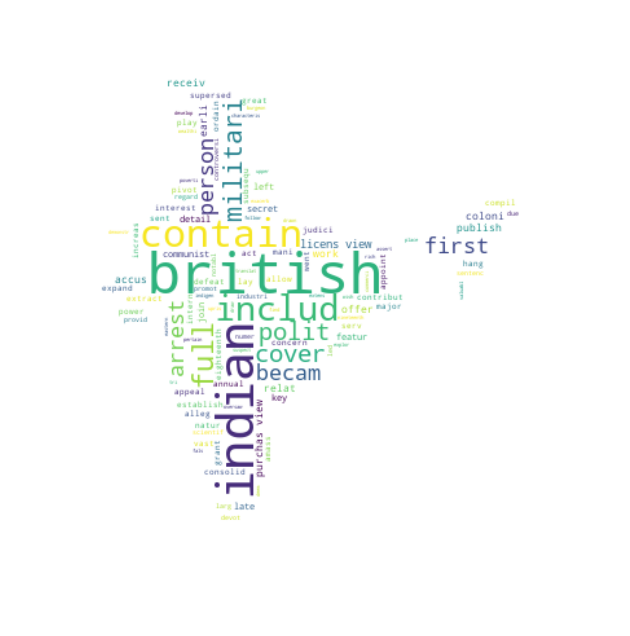

In [54]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np

# Download stopwords if not already present
nltk.download('stopwords')

# Create an instance of the stopwords
stop_words = set(stopwords.words('english'))

# Assuming you have loaded your text data into 'text_prep' DataFrame and processed it
text = ' '.join(text_prep['Review'])

# Load the image mask of India using the provided path
india_mask_path = "C:\\Users\\himav\\Downloads\\Final Indian Map.png"
india_mask = np.array(Image.open(india_mask_path))

# Generate the word cloud using the India map mask
wordcloud = WordCloud(width=1500, height=1500, background_color='white', stopwords=stop_words, mask=india_mask, contour_width=0, contour_color='black').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


## Defining Sentiment Polarity Function

In [47]:
# Define a function to get the sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

## Applying Sentiment Polarity Function

In [48]:
# Apply the function to the Review column
text_prep['Sentiment_Polarity'] = text_prep['Review'].apply(get_polarity)

# Display the DataFrame with the new Sentiment_Polarity column
print(text_prep)

                                               Review  Review_length  \
0                                                full             94   
1                                   purchas view full             53   
2                                         licens view             54   
3   first serv drawn person find extens polit secr...            475   
4   offer valuabl upper consolid indian establish ...            819   
..                                                ...            ...   
69  british slave trade mani indian exist indentur...            269   
70                 due tempestu french current featur            148   
71            indian led signific relat devot foreign            229   
72  interest scientif rapid technolog characterist...            462   
73  contain numer detail publish featur becam supe...            248   

    count_exc  Polarity  Sentiment_Polarity  
0           0 -0.075000            0.350000  
1           0  0.350000            0.350000

## Visualizing Sentiment Polarity

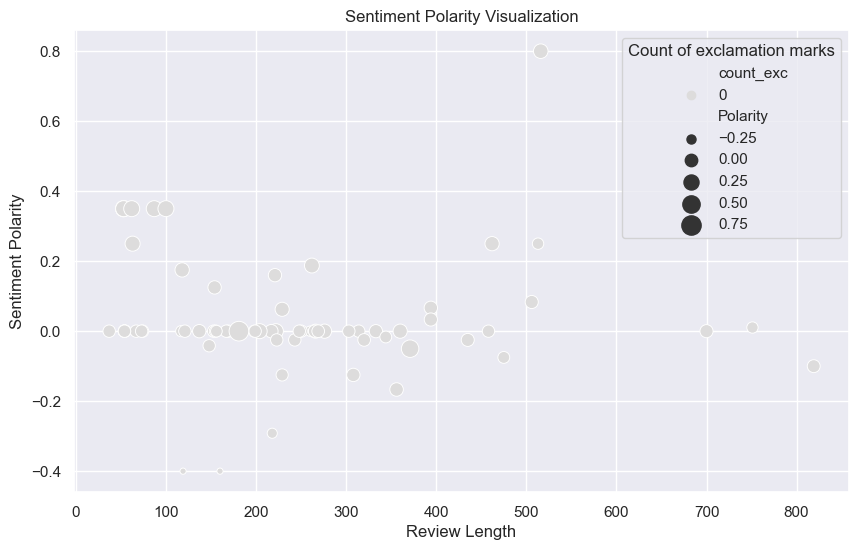

In [49]:
# Create a scatter plot to visualize sentiment polarity against review length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=text_prep, x='Review_length', y='Sentiment_Polarity', hue='count_exc', palette='coolwarm', size='Polarity', sizes=(20, 200))

# Set plot title, labels, grid, and legend
plt.title('Sentiment Polarity Visualization')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.legend(title='Count of exclamation marks')

# Display the plot
plt.show()

## Comparing Sentiment Polarity with Polarity

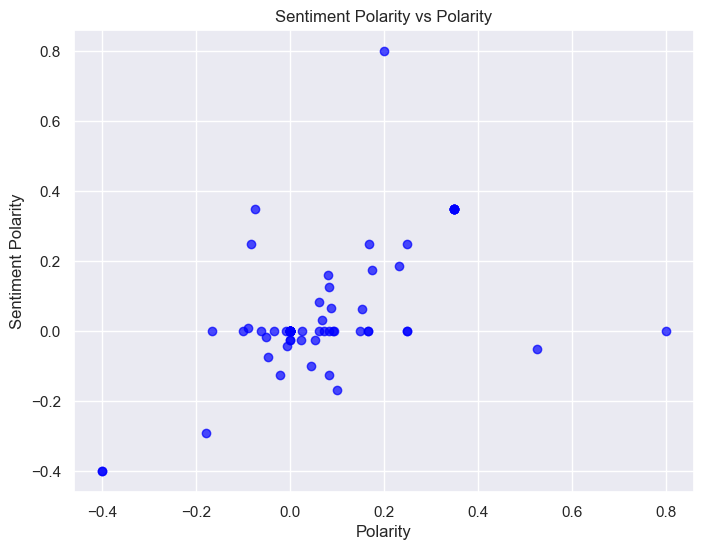

In [50]:
# Extracting data
polarity = text_prep["Polarity"]
sentiment_polarity = text_prep["Sentiment_Polarity"]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(polarity, sentiment_polarity, color='blue', alpha=0.7)
plt.title('Sentiment Polarity vs Polarity')
plt.xlabel('Polarity')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()

## Distribution of Positive and Negative Polarity

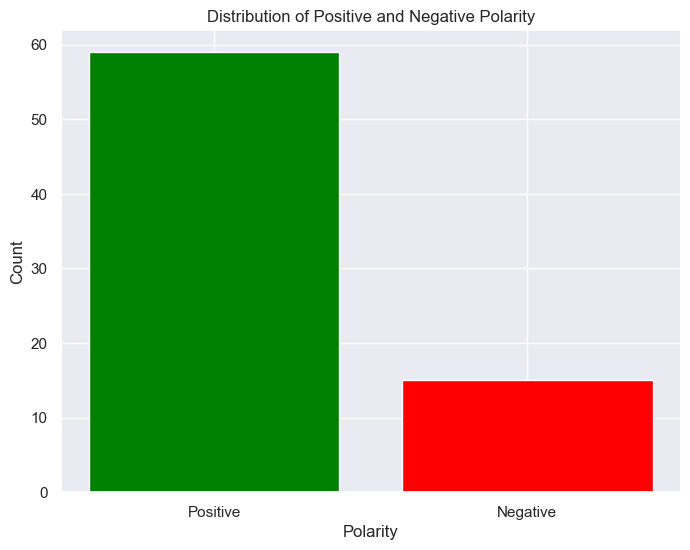

In [51]:
# Extracting positive and negative polarities
positive_polarity = [p for p in text_prep["Sentiment_Polarity"] if p >= 0]
negative_polarity = [p for p in text_prep["Sentiment_Polarity"] if p < 0]

# Counting positive and negative polarities
positive_count = len(positive_polarity)
negative_count = len(negative_polarity)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Distribution of Positive and Negative Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

## Metrics evaluation

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error

# Assuming you have the actual sentiment labels derived from Sentiment_Polarity
actual_sentiments = np.where(text_prep['Sentiment_Polarity'] > 0, 1, 0)

# Predicted sentiments based on Polarity (positive if Polarity > 0, negative otherwise)
predicted_sentiments = np.where(text_prep['Polarity'] > 0, 1, 0)

# Accuracy
accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
print("Accuracy:", accuracy)

# Precision and Recall
precision = precision_score(actual_sentiments, predicted_sentiments)
recall = recall_score(actual_sentiments, predicted_sentiments)
print("Precision:", precision)
print("Recall:", recall)

# F1 Score
f1 = f1_score(actual_sentiments, predicted_sentiments)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(actual_sentiments, predicted_sentiments)
print("Confusion Matrix:\n", conf_matrix)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(text_prep['Sentiment_Polarity'], text_prep['Polarity'])
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(text_prep['Sentiment_Polarity'], text_prep['Polarity'], squared=False)
print("RMSE:", rmse)


Accuracy: 0.7162162162162162
Precision: 0.5
Recall: 0.8571428571428571
F1 Score: 0.631578947368421
Confusion Matrix:
 [[35 18]
 [ 3 18]]
MAE: 0.08296170277420277
RMSE: 0.16889096626841413
